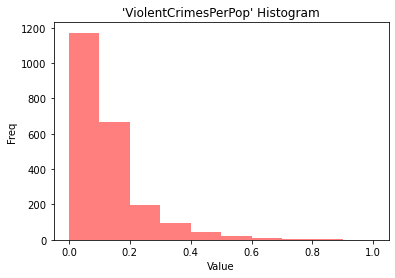

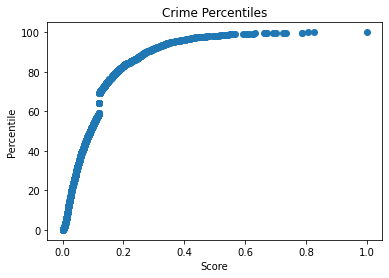

(1881, 100)
(333, 100)


In [18]:
%run alt_Preprocessing.ipynb

In [22]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [23]:
#get a stacking ensemble of models
def get_stacking():
    # firstly, define the base models
    level0 = list()
    level0.append(('cart',DecisionTreeClassifier()))
    level0.append(('svm',SVC()))
    level0.append(('bayes', GaussianNB()))
    #define the meta learner mode
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv = 5)
    return model

In [24]:
#get a list of the models to evaluate
def get_models():
    models = dict()
    models['Decision tree'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['GaussianNB'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

In [26]:
#evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    scores1 = cross_val_score(model, x_val, y_val, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores, scores1

>Decision tree -> 0.776 (0.033)---Wine dataset
>Decision tree -> 0.817 (0.058)---Iris dataset


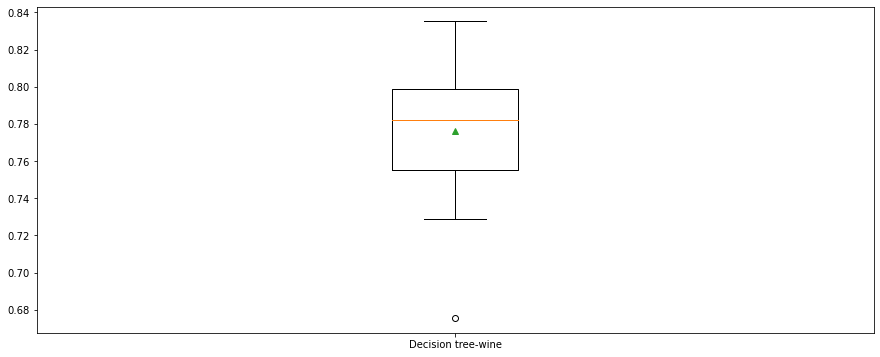

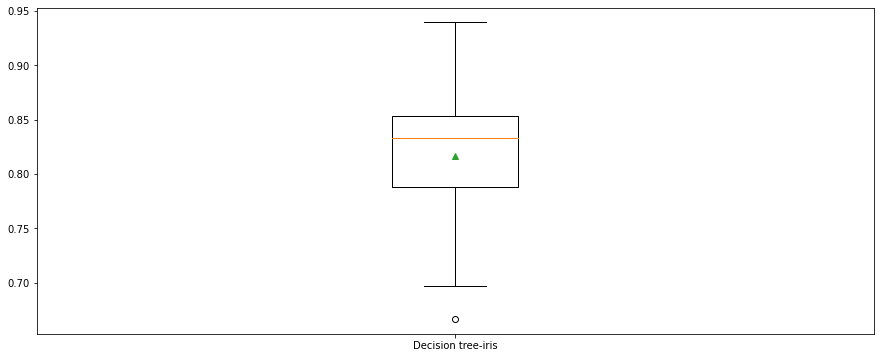

>svm -> 0.848 (0.029)---Wine dataset
>svm -> 0.857 (0.057)---Iris dataset


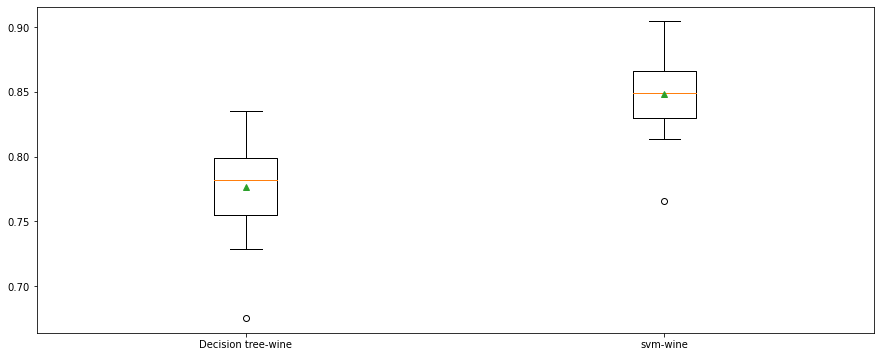

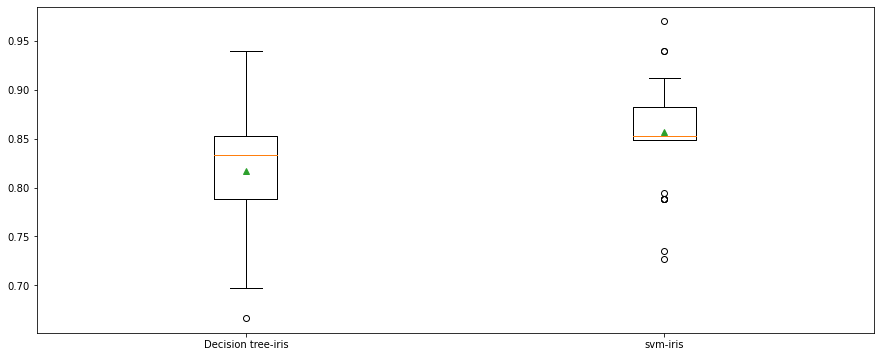

>GaussianNB -> 0.824 (0.030)---Wine dataset
>GaussianNB -> 0.820 (0.077)---Iris dataset


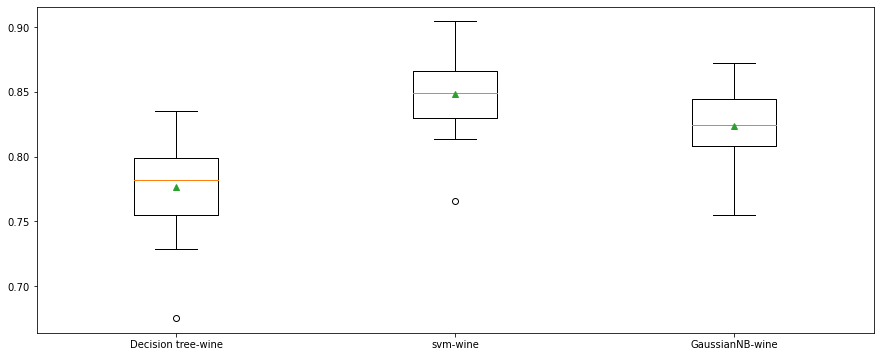

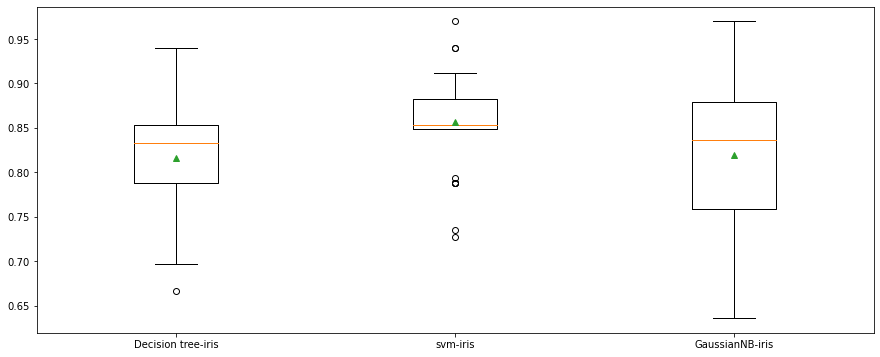

>stacking -> 0.849 (0.030)---Wine dataset
>stacking -> 0.866 (0.058)---Iris dataset


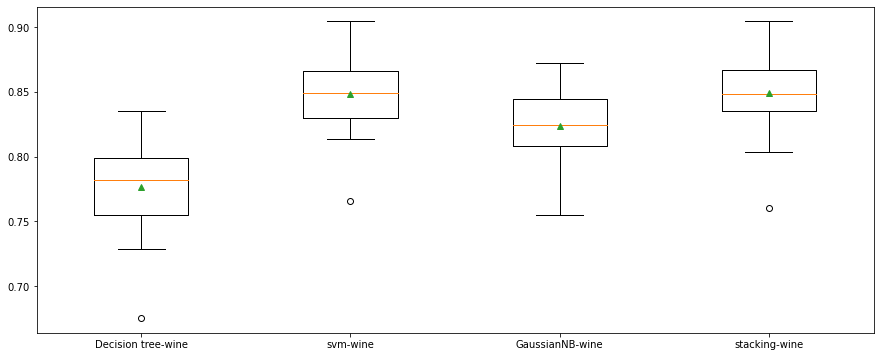

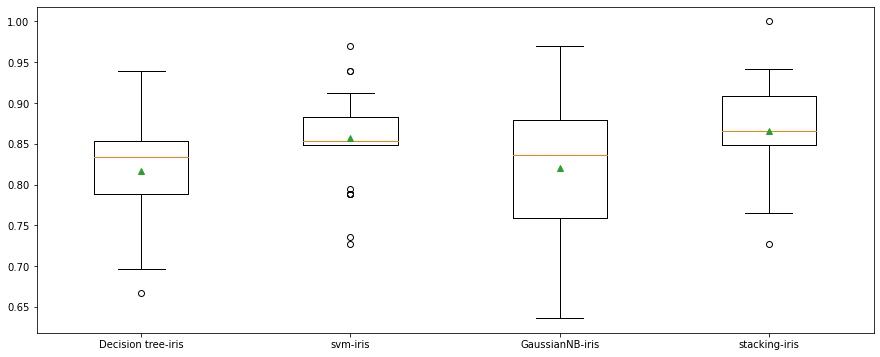

In [28]:
# get the models to evalutae
models = get_models()
# creating lists to store the results
results, names, results1 = list(), list(), list()

for name, model in models.items():
    scores,scores1 = evaluate_model(model)
    results.append(scores)
    results1.append(scores1)
    names.append(name)
    print('>%s -> %.3f (%.3f)---Wine dataset' % (name, mean(scores), std(scores)))
    print('>%s -> %.3f (%.3f)---Iris dataset' % (name, mean(scores1), std(scores1)))
    pyplot.rcParams["figure.figsize"] = (15,6)
    pyplot.boxplot(results, labels=[s+"-wine" for s in names], showmeans=True)
    pyplot.show()
    pyplot.boxplot(results1, labels=[s+"-iris" for s in names], showmeans=True)
    pyplot.show()